# Overview

This a notebook that 
1. inspects the results of a WarpX simulation
2. generates data files at different spatial locations, each file containing two columns: time sequence and field values
3. does fft of the field 

# Instruction

Enter the path of the data you wish to visualize below. Then execute the cells one by one, by selecting them with your mouse and typing `Shift + Enter`

In [24]:
# Import statements
import yt ; yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
from numpy import fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math

### Define plotfile name

In [25]:
np.seterr(divide = 'ignore') 
diag_name = 'plt_spidernet0720_' # E.g., diagnostics.diags_names = diag

### Initialize data files to be written in

In [26]:
j0 = 0; j1 = 2; dj = 1 # starting y index j0; ending y index j1; interval dj
tn0 = 1000; tn1 = 100000; dnt = 1000 # starting t index tn0; ending t index tn1; interval dnt

for j in range(j0, j1, dj):
    filename = 'Ez_CPW_j%d.dat' %j
    f = open(filename, 'w') # writing mode
    np.savetxt(f, [])

### Save data into the data files using numpy 

In [28]:
dt = 2.948161989e-15

# path_to_output = '/path'
# plotfile = path_to_output+'{}{:05d}'.format(diag_name,iteration)

for iteration in range (tn0, tn1, dnt) : # time step
    plotfile = './diags/{}{:05d}'.format(diag_name, iteration)
    ds = yt.load( plotfile ) # Load the plotfile
    #ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    ad0 = ds.covering_grid(level=0, left_edge=[ 0., -1.375e-2, 0.], dims=[ 2, 2, 2]) 
    y_array = ad0['y'].to_ndarray()
    Ez_array = ad0['Ez'].to_ndarray()
    for j in range(j0, j1, dj):
        data = np.column_stack((dt * iteration, Ez_array[1,j,1]))
        filename = 'Ez_CPW_j%d.dat' %j
        f = open(filename, 'a') # writing mode
        np.savetxt(f, data)
        f.close()
        
ds.field_list # Print all available quantities


[('boxlib', 'Bx'),
 ('boxlib', 'By'),
 ('boxlib', 'Bz'),
 ('boxlib', 'Ex'),
 ('boxlib', 'Ey'),
 ('boxlib', 'Ez')]

### Read field from data files and plot field as a function time

Text(0.5, 0, 'time in second')

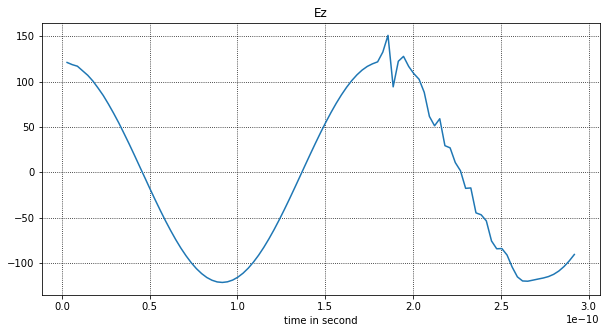

In [29]:
rcParams['figure.figsize'] = 10, 5

j = 0
data = np.loadtxt('./Ez_CPW_j%d.dat' %j) 
nt = data[:, 0]
Ez = data[:, 1]
plt.plot(nt, Ez)
plt.grid(True, color='k', linestyle=':')
plt.title("Ez")
plt.xlabel("time in second")

### FFT in time domain

In [30]:
nt_scaled = math.floor((tn1-tn0)/dnt)    # Number of data points in input
dt_scaled = dt*dnt    # Sampling period (in meters)

Ez_freq = fft.fft(Ez)/nt_scaled    # Fourier coefficients (divided by n)

freq = fft.fftfreq(nt_scaled,dt_scaled)  # Natural frequencies

Ez_freq = fft.fftshift(Ez_freq)   # Shift zero freq to center
freq = fft.fftshift(freq)   # Shift zero freq to center


### Plot frequency-domain field values

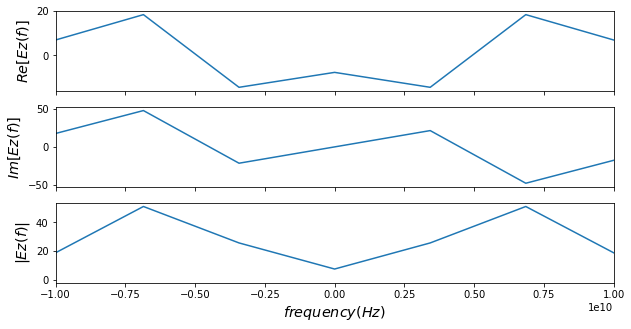

In [33]:
f, ax = plt.subplots(3,1,sharex=True)
ax[0].plot(freq, np.real(Ez_freq))         # Plot Cosine terms
ax[0].set_ylabel(r'$Re[Ez(f)]$', size = 'x-large')
ax[1].plot(freq, np.imag(Ez_freq))         # Plot Sine terms
ax[1].set_ylabel(r'$Im[Ez(f)]$', size = 'x-large')
ax[2].plot(freq, np.absolute(Ez_freq))  # Plot spectral power
ax[2].set_ylabel(r'$|Ez(f)|$', size = 'x-large')
ax[2].set_xlabel(r'$frequency(Hz)$', size = 'x-large')
plt.xlim((-10e9,10e9))
plt.show()